## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 64
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9726947	total: 58.6ms	remaining: 58.5s
1:	learn: 0.9560934	total: 59.5ms	remaining: 29.7s
2:	learn: 0.9356433	total: 60.4ms	remaining: 20.1s
3:	learn: 0.9201346	total: 61.4ms	remaining: 15.3s
4:	learn: 0.9025054	total: 62.5ms	remaining: 12.4s
5:	learn: 0.8859587	total: 63.5ms	remaining: 10.5s
6:	learn: 0.8705069	total: 64.5ms	remaining: 9.14s
7:	learn: 0.8553411	total: 65.4ms	remaining: 8.11s
8:	learn: 0.8398888	total: 66.3ms	remaining: 7.29s
9:	learn: 0.8239691	total: 67.1ms	remaining: 6.64s
10:	learn: 0.8114268	total: 67.9ms	remaining: 6.1s
11:	learn: 0.7966996	total: 68.7ms	remaining: 5.66s
12:	learn: 0.7823238	total: 69.5ms	remaining: 5.28s
13:	learn: 0.7682000	total: 70.2ms	remaining: 4.95s
14:	learn: 0.7564134	total: 71ms	remaining: 4.66s
15:	learn: 0.7438808	total: 71.7ms	remaining: 4.41s
16:	learn: 0.7323151	total: 72.5ms	remaining: 4.19s
17:	learn: 0.7214065	total: 73.3ms	remaining: 4s
18:	learn: 0.7090886	total: 74.1ms	remaining: 3.83

61:	learn: 0.4195704	total: 110ms	remaining: 1.66s
62:	learn: 0.4163450	total: 111ms	remaining: 1.65s
63:	learn: 0.4129080	total: 112ms	remaining: 1.63s
64:	learn: 0.4089255	total: 112ms	remaining: 1.61s
65:	learn: 0.4054669	total: 113ms	remaining: 1.6s
66:	learn: 0.4016660	total: 114ms	remaining: 1.59s
67:	learn: 0.3984330	total: 115ms	remaining: 1.57s
68:	learn: 0.3954315	total: 116ms	remaining: 1.56s
69:	learn: 0.3926379	total: 117ms	remaining: 1.55s
70:	learn: 0.3894480	total: 118ms	remaining: 1.54s
71:	learn: 0.3869742	total: 118ms	remaining: 1.53s
72:	learn: 0.3846383	total: 119ms	remaining: 1.52s
73:	learn: 0.3816112	total: 120ms	remaining: 1.51s
74:	learn: 0.3786482	total: 121ms	remaining: 1.5s
75:	learn: 0.3757711	total: 122ms	remaining: 1.48s
76:	learn: 0.3731232	total: 123ms	remaining: 1.47s
77:	learn: 0.3707759	total: 123ms	remaining: 1.46s
78:	learn: 0.3686095	total: 124ms	remaining: 1.45s
79:	learn: 0.3660479	total: 125ms	remaining: 1.44s
80:	learn: 0.3635869	total: 125ms

156:	learn: 0.2564935	total: 192ms	remaining: 1.03s
157:	learn: 0.2556866	total: 193ms	remaining: 1.03s
158:	learn: 0.2548258	total: 193ms	remaining: 1.02s
159:	learn: 0.2538064	total: 194ms	remaining: 1.02s
160:	learn: 0.2531540	total: 195ms	remaining: 1.02s
161:	learn: 0.2523340	total: 196ms	remaining: 1.01s
162:	learn: 0.2517137	total: 197ms	remaining: 1.01s
163:	learn: 0.2508704	total: 198ms	remaining: 1.01s
164:	learn: 0.2502652	total: 199ms	remaining: 1s
165:	learn: 0.2497887	total: 199ms	remaining: 1s
166:	learn: 0.2492576	total: 200ms	remaining: 998ms
167:	learn: 0.2487231	total: 201ms	remaining: 995ms
168:	learn: 0.2481712	total: 202ms	remaining: 992ms
169:	learn: 0.2474930	total: 203ms	remaining: 989ms
170:	learn: 0.2469788	total: 203ms	remaining: 985ms
171:	learn: 0.2460189	total: 204ms	remaining: 982ms
172:	learn: 0.2453531	total: 205ms	remaining: 979ms
173:	learn: 0.2445335	total: 206ms	remaining: 977ms
174:	learn: 0.2437995	total: 207ms	remaining: 974ms
175:	learn: 0.2430

285:	learn: 0.1856379	total: 299ms	remaining: 747ms
286:	learn: 0.1852181	total: 300ms	remaining: 746ms
287:	learn: 0.1846881	total: 301ms	remaining: 745ms
288:	learn: 0.1844250	total: 302ms	remaining: 743ms
289:	learn: 0.1839673	total: 303ms	remaining: 742ms
290:	learn: 0.1837853	total: 304ms	remaining: 740ms
291:	learn: 0.1833929	total: 305ms	remaining: 738ms
292:	learn: 0.1831298	total: 305ms	remaining: 737ms
293:	learn: 0.1827951	total: 306ms	remaining: 735ms
294:	learn: 0.1822241	total: 307ms	remaining: 734ms
295:	learn: 0.1815517	total: 308ms	remaining: 732ms
296:	learn: 0.1813976	total: 309ms	remaining: 731ms
297:	learn: 0.1811841	total: 310ms	remaining: 729ms
298:	learn: 0.1806057	total: 310ms	remaining: 728ms
299:	learn: 0.1803295	total: 311ms	remaining: 726ms
300:	learn: 0.1800830	total: 312ms	remaining: 725ms
301:	learn: 0.1798373	total: 313ms	remaining: 724ms
302:	learn: 0.1795802	total: 314ms	remaining: 722ms
303:	learn: 0.1793179	total: 315ms	remaining: 721ms
304:	learn: 

384:	learn: 0.1533187	total: 382ms	remaining: 610ms
385:	learn: 0.1529701	total: 383ms	remaining: 609ms
386:	learn: 0.1527658	total: 384ms	remaining: 608ms
387:	learn: 0.1525689	total: 385ms	remaining: 607ms
388:	learn: 0.1522770	total: 385ms	remaining: 605ms
389:	learn: 0.1519528	total: 386ms	remaining: 604ms
390:	learn: 0.1516642	total: 387ms	remaining: 603ms
391:	learn: 0.1513290	total: 388ms	remaining: 602ms
392:	learn: 0.1512716	total: 389ms	remaining: 600ms
393:	learn: 0.1508792	total: 389ms	remaining: 599ms
394:	learn: 0.1507065	total: 390ms	remaining: 598ms
395:	learn: 0.1504000	total: 391ms	remaining: 597ms
396:	learn: 0.1503638	total: 392ms	remaining: 595ms
397:	learn: 0.1500884	total: 393ms	remaining: 594ms
398:	learn: 0.1499303	total: 394ms	remaining: 593ms
399:	learn: 0.1495977	total: 395ms	remaining: 592ms
400:	learn: 0.1493428	total: 395ms	remaining: 591ms
401:	learn: 0.1491868	total: 396ms	remaining: 589ms
402:	learn: 0.1487410	total: 397ms	remaining: 588ms
403:	learn: 

514:	learn: 0.1226469	total: 489ms	remaining: 461ms
515:	learn: 0.1226183	total: 490ms	remaining: 460ms
516:	learn: 0.1224483	total: 491ms	remaining: 459ms
517:	learn: 0.1221612	total: 492ms	remaining: 458ms
518:	learn: 0.1219562	total: 493ms	remaining: 456ms
519:	learn: 0.1217270	total: 493ms	remaining: 455ms
520:	learn: 0.1215624	total: 494ms	remaining: 454ms
521:	learn: 0.1214754	total: 495ms	remaining: 453ms
522:	learn: 0.1211176	total: 496ms	remaining: 452ms
523:	learn: 0.1208782	total: 497ms	remaining: 451ms
524:	learn: 0.1206791	total: 498ms	remaining: 450ms
525:	learn: 0.1204059	total: 498ms	remaining: 449ms
526:	learn: 0.1202407	total: 499ms	remaining: 448ms
527:	learn: 0.1201686	total: 500ms	remaining: 447ms
528:	learn: 0.1200220	total: 501ms	remaining: 446ms
529:	learn: 0.1198225	total: 502ms	remaining: 445ms
530:	learn: 0.1197000	total: 502ms	remaining: 444ms
531:	learn: 0.1193878	total: 503ms	remaining: 443ms
532:	learn: 0.1193610	total: 504ms	remaining: 442ms
533:	learn: 

614:	learn: 0.1051724	total: 571ms	remaining: 358ms
615:	learn: 0.1050805	total: 572ms	remaining: 357ms
616:	learn: 0.1048351	total: 573ms	remaining: 356ms
617:	learn: 0.1047005	total: 574ms	remaining: 355ms
618:	learn: 0.1046724	total: 575ms	remaining: 354ms
619:	learn: 0.1045170	total: 576ms	remaining: 353ms
620:	learn: 0.1044668	total: 576ms	remaining: 352ms
621:	learn: 0.1043972	total: 577ms	remaining: 351ms
622:	learn: 0.1042958	total: 578ms	remaining: 350ms
623:	learn: 0.1042704	total: 579ms	remaining: 349ms
624:	learn: 0.1041224	total: 579ms	remaining: 348ms
625:	learn: 0.1040217	total: 580ms	remaining: 347ms
626:	learn: 0.1037902	total: 581ms	remaining: 346ms
627:	learn: 0.1036627	total: 582ms	remaining: 345ms
628:	learn: 0.1034084	total: 583ms	remaining: 344ms
629:	learn: 0.1032950	total: 584ms	remaining: 343ms
630:	learn: 0.1031077	total: 584ms	remaining: 342ms
631:	learn: 0.1029224	total: 585ms	remaining: 341ms
632:	learn: 0.1027540	total: 586ms	remaining: 340ms
633:	learn: 

746:	learn: 0.0864428	total: 680ms	remaining: 230ms
747:	learn: 0.0863997	total: 681ms	remaining: 230ms
748:	learn: 0.0862421	total: 682ms	remaining: 229ms
749:	learn: 0.0860850	total: 683ms	remaining: 228ms
750:	learn: 0.0859340	total: 684ms	remaining: 227ms
751:	learn: 0.0857391	total: 685ms	remaining: 226ms
752:	learn: 0.0855798	total: 686ms	remaining: 225ms
753:	learn: 0.0854037	total: 686ms	remaining: 224ms
754:	learn: 0.0852872	total: 687ms	remaining: 223ms
755:	learn: 0.0851850	total: 688ms	remaining: 222ms
756:	learn: 0.0850990	total: 689ms	remaining: 221ms
757:	learn: 0.0849786	total: 690ms	remaining: 220ms
758:	learn: 0.0848713	total: 690ms	remaining: 219ms
759:	learn: 0.0848603	total: 691ms	remaining: 218ms
760:	learn: 0.0847420	total: 692ms	remaining: 217ms
761:	learn: 0.0846639	total: 693ms	remaining: 216ms
762:	learn: 0.0846056	total: 694ms	remaining: 215ms
763:	learn: 0.0844797	total: 695ms	remaining: 215ms
764:	learn: 0.0843725	total: 695ms	remaining: 214ms
765:	learn: 

846:	learn: 0.0753394	total: 762ms	remaining: 138ms
847:	learn: 0.0752306	total: 763ms	remaining: 137ms
848:	learn: 0.0751213	total: 764ms	remaining: 136ms
849:	learn: 0.0749973	total: 764ms	remaining: 135ms
850:	learn: 0.0749068	total: 765ms	remaining: 134ms
851:	learn: 0.0747767	total: 766ms	remaining: 133ms
852:	learn: 0.0747215	total: 767ms	remaining: 132ms
853:	learn: 0.0745683	total: 768ms	remaining: 131ms
854:	learn: 0.0744014	total: 769ms	remaining: 130ms
855:	learn: 0.0743946	total: 769ms	remaining: 129ms
856:	learn: 0.0742184	total: 770ms	remaining: 129ms
857:	learn: 0.0741835	total: 771ms	remaining: 128ms
858:	learn: 0.0740536	total: 772ms	remaining: 127ms
859:	learn: 0.0740018	total: 773ms	remaining: 126ms
860:	learn: 0.0739485	total: 773ms	remaining: 125ms
861:	learn: 0.0739217	total: 774ms	remaining: 124ms
862:	learn: 0.0737465	total: 775ms	remaining: 123ms
863:	learn: 0.0737039	total: 776ms	remaining: 122ms
864:	learn: 0.0736591	total: 776ms	remaining: 121ms
865:	learn: 

980:	learn: 0.0625355	total: 870ms	remaining: 16.9ms
981:	learn: 0.0623991	total: 871ms	remaining: 16ms
982:	learn: 0.0622892	total: 872ms	remaining: 15.1ms
983:	learn: 0.0621871	total: 873ms	remaining: 14.2ms
984:	learn: 0.0621827	total: 874ms	remaining: 13.3ms
985:	learn: 0.0621127	total: 875ms	remaining: 12.4ms
986:	learn: 0.0620373	total: 875ms	remaining: 11.5ms
987:	learn: 0.0619800	total: 876ms	remaining: 10.6ms
988:	learn: 0.0619439	total: 877ms	remaining: 9.76ms
989:	learn: 0.0618638	total: 878ms	remaining: 8.87ms
990:	learn: 0.0618192	total: 879ms	remaining: 7.98ms
991:	learn: 0.0616652	total: 879ms	remaining: 7.09ms
992:	learn: 0.0615379	total: 880ms	remaining: 6.21ms
993:	learn: 0.0614464	total: 881ms	remaining: 5.32ms
994:	learn: 0.0613308	total: 882ms	remaining: 4.43ms
995:	learn: 0.0612675	total: 883ms	remaining: 3.54ms
996:	learn: 0.0612609	total: 883ms	remaining: 2.66ms
997:	learn: 0.0612111	total: 884ms	remaining: 1.77ms
998:	learn: 0.0611568	total: 885ms	remaining: 88

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

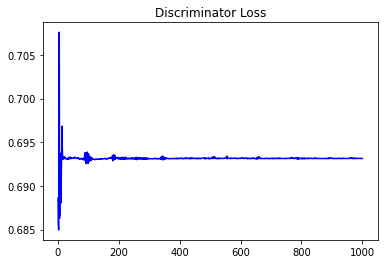

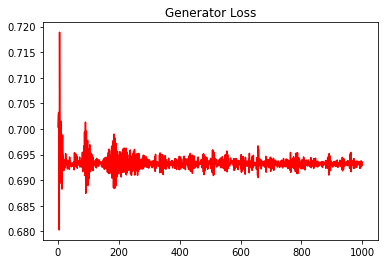

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.09686725191637753


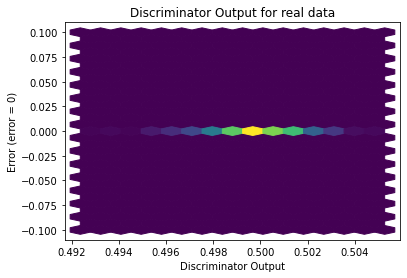

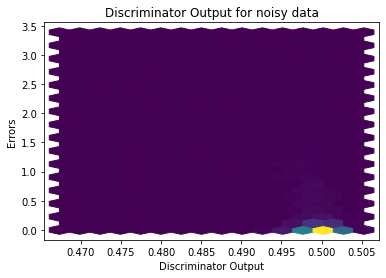

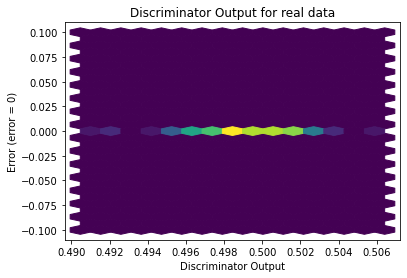

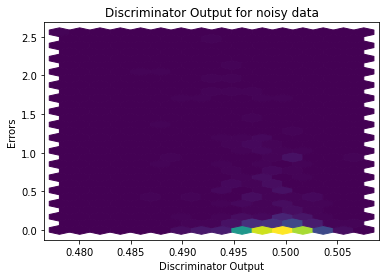

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


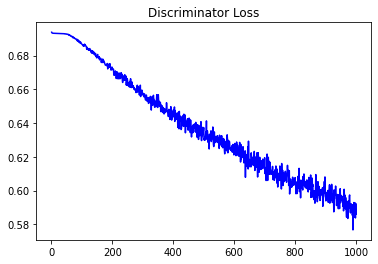

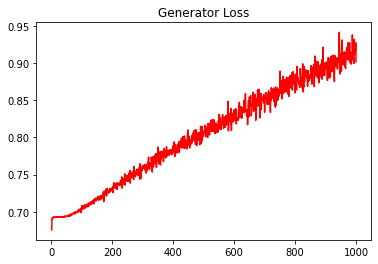

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08607296286023738


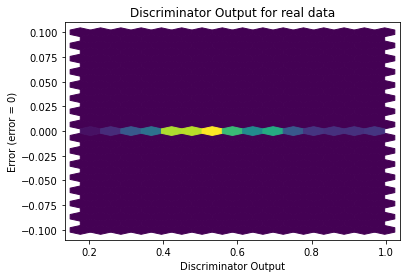

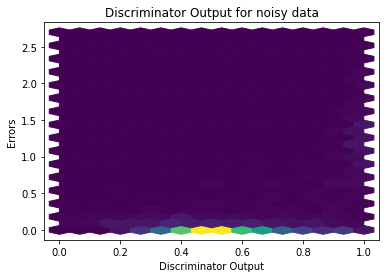

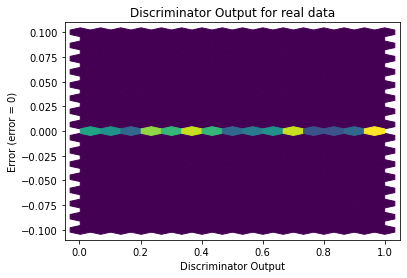

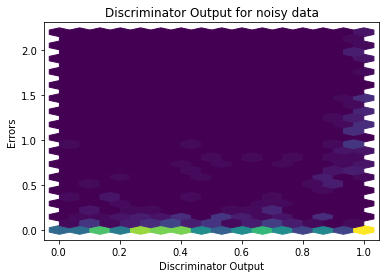

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
